None


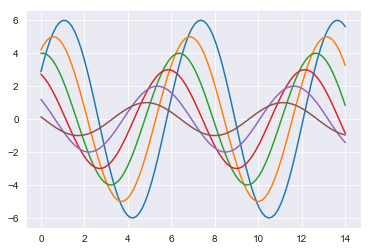

In [3]:
import numpy as np
import matplotlib.pyplot as plt
def sinplot(flip=1):
    x = np.linspace(0, 14, 100)
    for i in range(1, 7):
        plt.plot(x, np.sin(x + i * .5) * (7 - i) * flip)
print(sinplot())

None


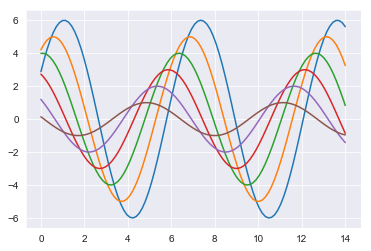

In [4]:
import seaborn as sns
sns.set_style("darkgrid")
print(sinplot())

None


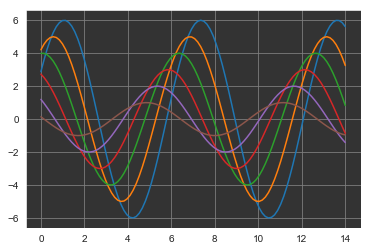

In [9]:
sns.set_style("darkgrid", {"axes.facecolor": ".2","grid.color":".5"})
print(sinplot())

上面都是一些对Seaborn的探索
========

In [5]:
titanic=sns.load_dataset("titanic")
print(titanic.describe())


         survived      pclass         age       sibsp       parch        fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200


Passengergerld:id

SibSp:兄弟姐妹

Parch:父母和小孩

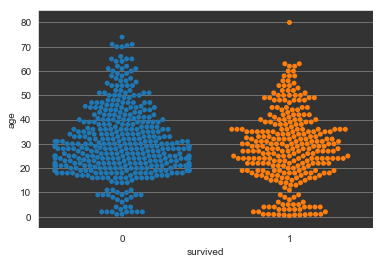

In [13]:
sns.swarmplot(x="survived",y="age",data=titanic)
plt.show()

可以看出，死亡和存活的人数在年龄上没有太大的差异

C:\Users\14232\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


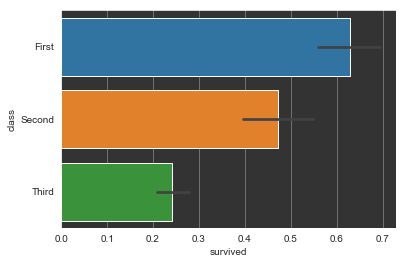

In [16]:
sns.barplot(x="survived",y="class",data=titanic)
plt.show()

从上图可以看出，一等舱的存活概率最高，二等舱次之，我想看他们所有的和存活之间的关系，我把这些图都组合起来
=====

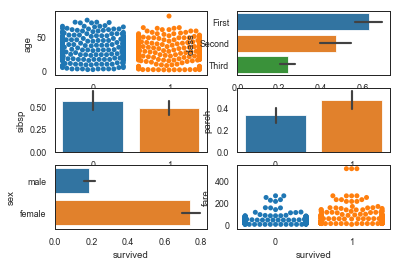

In [34]:
sns.set_style("white")
sns.set_context("paper")
fig,axes=plt.subplots(3,2)
sns.swarmplot(x="survived",y="age",data=titanic,ax=axes[0,0])
sns.barplot(x="survived",y="class",data=titanic,ax=axes[0,1])
sns.barplot(x="survived",y="sibsp",data=titanic,ax=axes[1,0])
sns.barplot(x="survived",y="parch",data=titanic,ax=axes[1,1])
sns.barplot(x="survived",y="sex",data=titanic,ax=axes[2,0])
sns.swarmplot(x="survived",y="fare",data=titanic,ax=axes[2,1])
plt.show()

这个有点丑，我还没有找到能把它弄大一点的命令，可以先凑合看一看，我之后再找找，我先做其他的图。

至少可以看见，除了前面两幅图的结论，还有有兄弟姐妹的存活率低，有孩子的存活率高，女性存活率高，第六幅图看不清....我再做一个吧
====

In [21]:
titanic.info()
age_med=titanic.age.median()
titanic.age.fillna(age_med, inplace=True)
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
survived       891 non-null int64
pclass         891 non-null int64
sex            891 non-null object
age            891 non-null float64
sibsp          891 non-null int64
parch          891 non-null int64
fare           891 non-null float64
embarked       889 non-null object
class          891 non-null category
who            891 non-null object
adult_male     891 non-null bool
deck           203 non-null category
embark_town    889 non-null object
alive          891 non-null object
alone          891 non-null bool
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
survived       891 non-null int64
pclass         891 non-null int64
sex            891 non-null object
age            891 non-null float64
sibsp          891 non-null int64
parch    

以上是对缺失值的插补
==

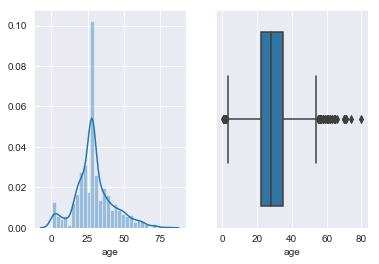

In [24]:
fig,axes=plt.subplots(1,3)
sns.distplot(titanic["age"],ax=axes[0])
sns.boxplot(titanic["age"],ax=axes[1])
plt.show()

可以发现年龄主要集中在20-40岁之间

In [2]:
from numpy import *
import matplotlib.pyplot as plt
import time

In [3]:
def sigmoid(inx):
    return 1/(1+exp(-inx))